# Assignment 3 - Estimate uncertainty using Monte-Carlo Simulation in Python

## Part A

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    """Define the sigmoid function."""
    return 1 / (1 + np.exp(-x))

def estimate_area(samples=10000, x_range=(0, 5), y_range=(0, 1)):
    # Generate random samples for x and y within the specified range
    x_samples = np.random.uniform(x_range[0], x_range[1], samples)
    y_samples = np.random.uniform(y_range[0], y_range[1], samples)
    
    # Determine which points fall under the sigmoid curve
    points_under_curve = y_samples <= sigmoid(x_samples)
    
    # Calculate the area based on the proportion of points under the curve
    area = (np.sum(points_under_curve) / samples) * (x_range[1] - x_range[0]) * (y_range[1] - y_range[0])
    return area

# Define different sample sizes for the simulation
sample_sizes = [100, 1000, 10000]
estimated_areas = [estimate_area(samples) for samples in sample_sizes]

# Results
for size, area in zip(sample_sizes, estimated_areas):
    print(f"Estimated area for {size} samples: {area:.5f}")


Estimated area with 100 samples: 4.55000
Estimated area with 1000 samples: 4.35000
Estimated area with 10000 samples: 4.30850


## Part B

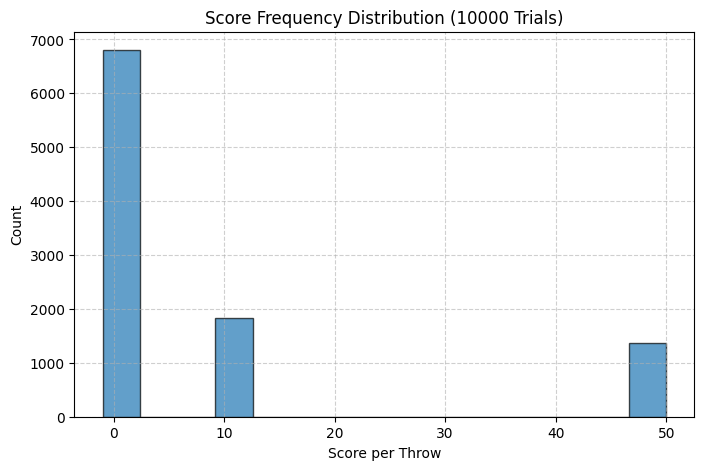

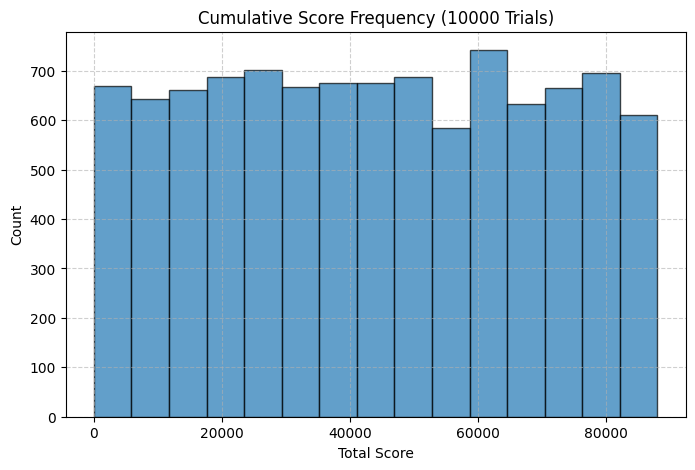

Mean Total Score: 43773.42
Score Variance: 635635944.68
Standard Deviation: 25211.82


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define probabilities for dart scores
score_probabilities = [0.04, 0.32, 0.36, 0.28]  # Probabilities of different outcomes
score_values = [-1, 1, 10, 50]  # Points assigned to each outcome

# Conduct a Monte Carlo simulation of the dart-throwing game
def run_dart_simulation(trials=10000):
    
    # Randomly determine whether a player gets to throw, simulating a coin flip
    toss_results = np.random.choice([0, 1], size=trials, p=[0.5, 0.5])
    
    # Simulate dart scores using predefined probabilities
    dart_outcomes = np.random.choice(score_values, size=trials, p=score_probabilities)
    
    # Assign scores based on the coin toss
    final_scores = np.where(toss_results == 1, dart_outcomes, 0)
    
    # Ensure cumulative score doesn't fall below zero
    cumulative_scores = np.maximum(0, np.cumsum(final_scores))
    
    return final_scores, cumulative_scores

# Number of trials to simulate
num_trials = 10000

# Execute the dart game simulation
final_scores, total_scores = run_dart_simulation(num_trials)

# Calculate statistical properties
average_score = np.mean(total_scores)
variance = np.var(total_scores)
standard_deviation = np.std(total_scores)

# Plot histogram of scores per round
plt.figure(figsize=(8, 5))
plt.hist(final_scores, bins=15, edgecolor='black', alpha=0.7)
plt.title(f"Score Frequency Distribution ({num_trials} Trials)")
plt.xlabel("Score per Throw")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Plot histogram for total cumulative scores
plt.figure(figsize=(8, 5))
plt.hist(total_scores, bins=15, edgecolor='black', alpha=0.7)
plt.title(f"Cumulative Score Frequency ({num_trials} Trials)")
plt.xlabel("Total Score")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Output results
print(f"Mean Total Score: {average_score:.2f}")
print(f"Score Variance: {variance:.2f}")
print(f"Standard Deviation: {standard_deviation:.2f}")


#### Geometric probabilty

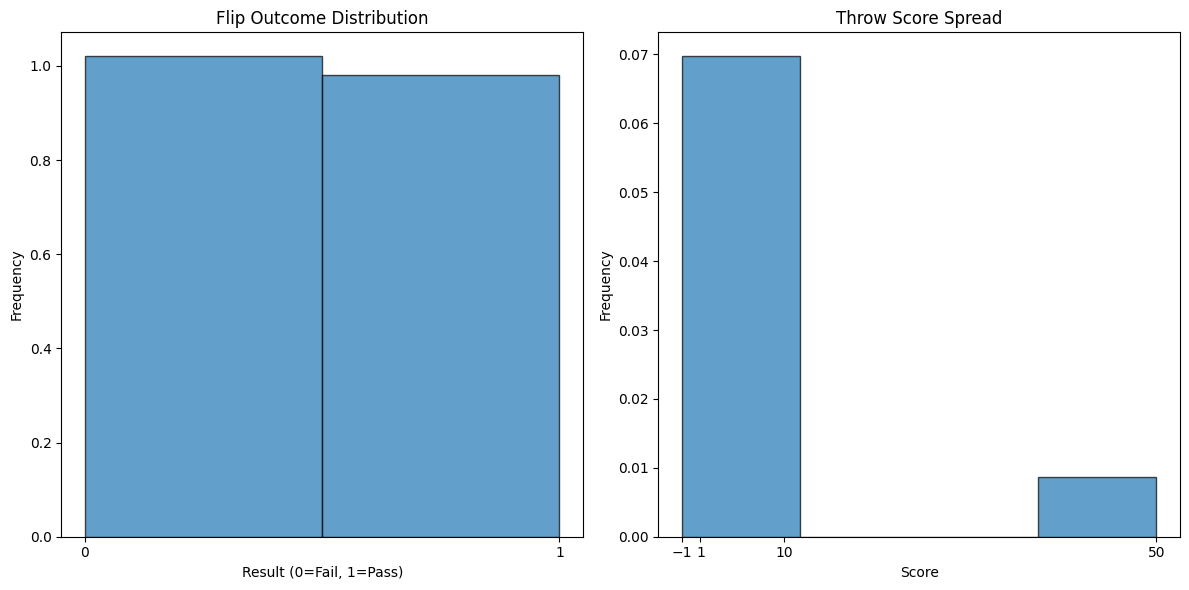

Projected average score: 17.74


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#  Perform a probability-based experiment involving flips and throws
def run_experiment(trials=10000):
    
    # Set up the probability values
    flip_chance = 0.5
    throw_likelihoods = [10/235, 125/235, 75/235, 25/235]
    throw_rewards = [-1, 1, 10, 50]
    
    # Generate random flips and throw results
    flips = np.random.binomial(1, flip_chance, trials)
    throws = np.random.choice(throw_rewards, size=trials, p=throw_likelihoods)
    
    # Generate histograms for results
    fig, graphs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Histogram for coin flips
    graphs[0].hist(flips, bins=2, edgecolor='black', alpha=0.7, density=True)
    graphs[0].set_title("Flip Outcome Distribution")
    graphs[0].set_xlabel("Result (0=Fail, 1=Pass)")
    graphs[0].set_ylabel("Frequency")
    graphs[0].set_xticks([0, 1])
    
    # Histogram for throw scores
    graphs[1].hist(throws, bins=len(throw_rewards), edgecolor='black', alpha=0.7, density=True)
    graphs[1].set_title("Throw Score Spread")
    graphs[1].set_xlabel("Score")
    graphs[1].set_ylabel("Frequency")
    graphs[1].set_xticks(throw_rewards)
    
    plt.tight_layout()
    plt.show()
    
    # Compute estimated outcome
    accumulated_points = []
    for _ in range(trials):
        points = 0
        for _ in range(4):
            # Perform a coin flip to decide if a throw is made
            if np.random.rand() < flip_chance:
                # Choose a throw outcome based on predefined probabilities
                points += np.random.choice(throw_rewards, p=throw_likelihoods)
        # Ensure the score is non-negative
        accumulated_points.append(max(0, points))
    
    avg_score = np.mean(accumulated_points)
    print(f"Projected average score: {avg_score:.2f}")

# Execute the experiment and visualize results
run_experiment(10000)


### Part B-1


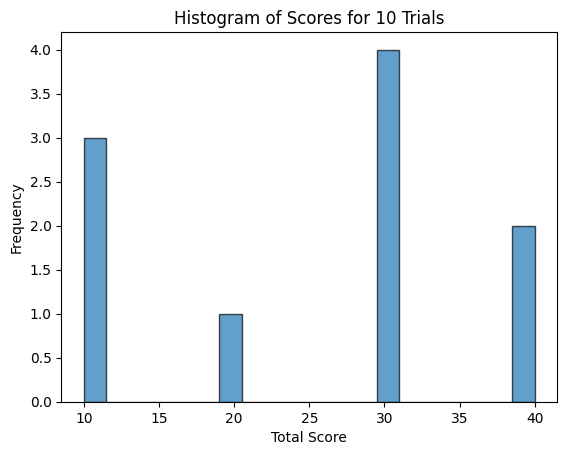

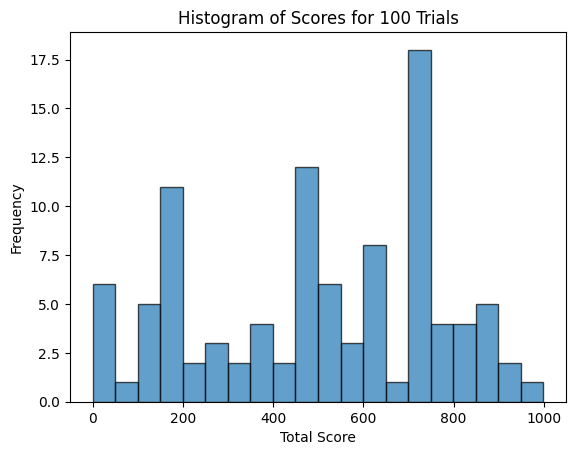

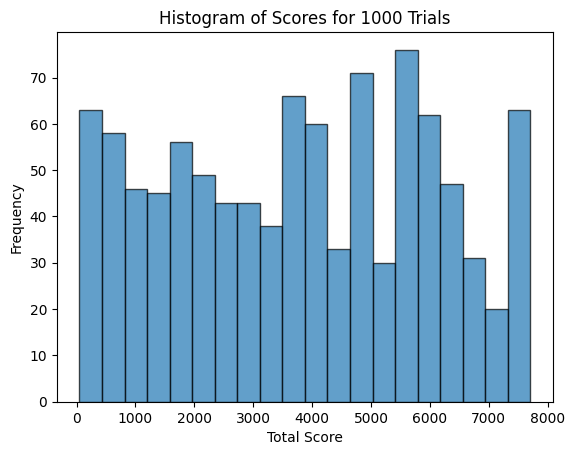

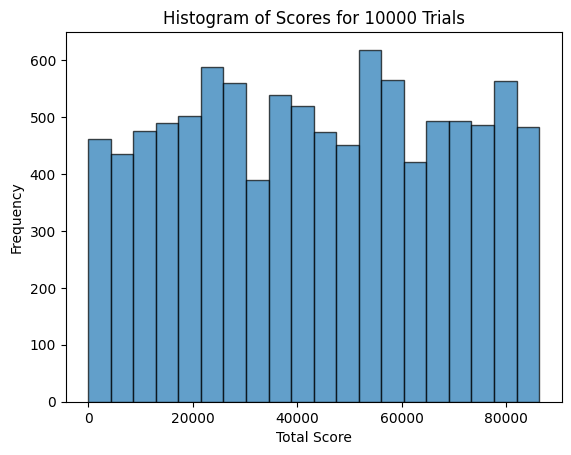

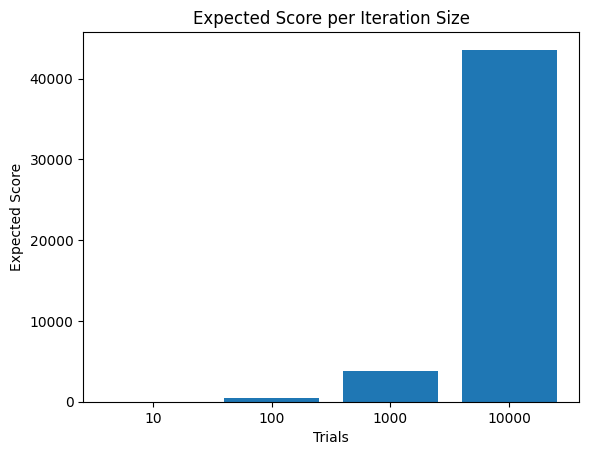

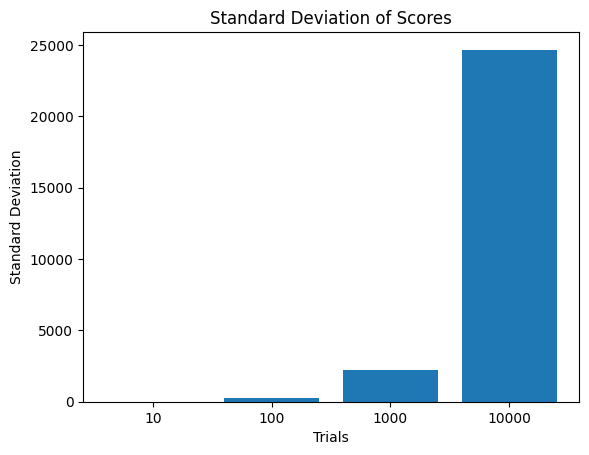

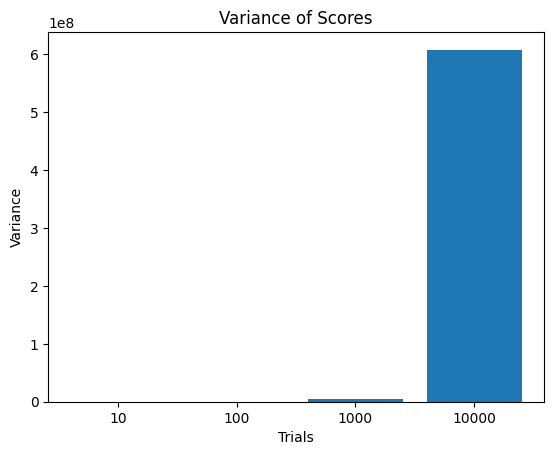

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Simulates a dart game where a coin toss determines if a throw is made
def run_dart_simulation(trials=10000):
    
    # Coin toss: 50% probability of throwing
    toss_results = np.random.randint(0, 2, size=trials)  # 0 or 1 (equivalent to heads/tails)
    
    # Dart score probabilities and corresponding scores
    ring_probabilities = [0.04, 0.32, 0.36, 0.28]
    ring_scores = [-1, 1, 10, 50]
    
    # Assign scores based on toss result
    dart_outcomes = np.random.choice(ring_scores, size=trials, p=ring_probabilities)
    final_scores = np.where(toss_results == 1, dart_outcomes, 0)
    
    # Ensure total score never drops below zero
    cumulative_scores = np.maximum(0, np.cumsum(final_scores))
    
    return cumulative_scores

# Iteration sizes
iteration_counts = [10, 100, 1000, 10000]
results = {num: run_dart_simulation(num) for num in iteration_counts}

# Compute statistics
expected_values = [np.mean(scores) for scores in results.values()]
variances = [np.var(scores) for scores in results.values()]
standard_devs = [np.std(scores) for scores in results.values()]

# Generate histograms for each iteration count
for num_trials, scores in results.items():
    plt.figure()
    plt.hist(scores, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Histogram of Scores for {num_trials} Trials")
    plt.xlabel("Total Score")
    plt.ylabel("Frequency")
    plt.show()

# Bar plots for statistics
plt.figure()
plt.bar([str(n) for n in iteration_counts], expected_values)
plt.title("Expected Score per Iteration Size")
plt.xlabel("Trials")
plt.ylabel("Expected Score")
plt.show()

plt.figure()
plt.bar([str(n) for n in iteration_counts], standard_devs)
plt.title("Standard Deviation of Scores")
plt.xlabel("Trials")
plt.ylabel("Standard Deviation")
plt.show()

plt.figure()
plt.bar([str(n) for n in iteration_counts], variances)
plt.title("Variance of Scores")
plt.xlabel("Trials")
plt.ylabel("Variance")
plt.show()


### Part B-2

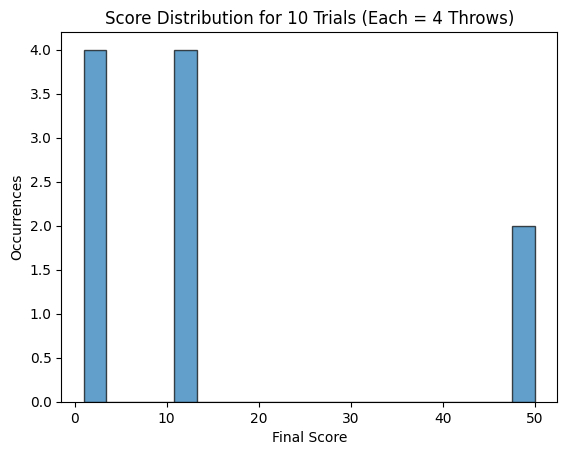

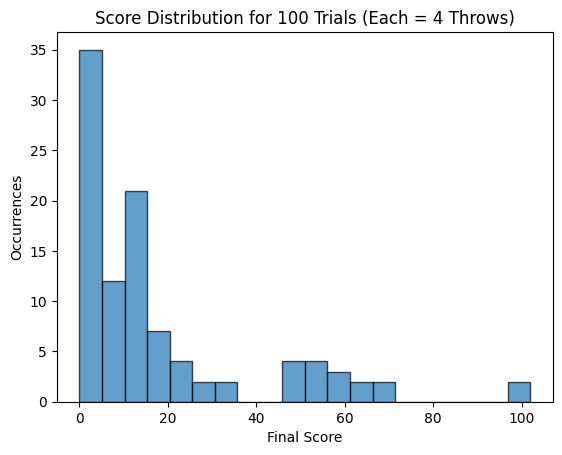

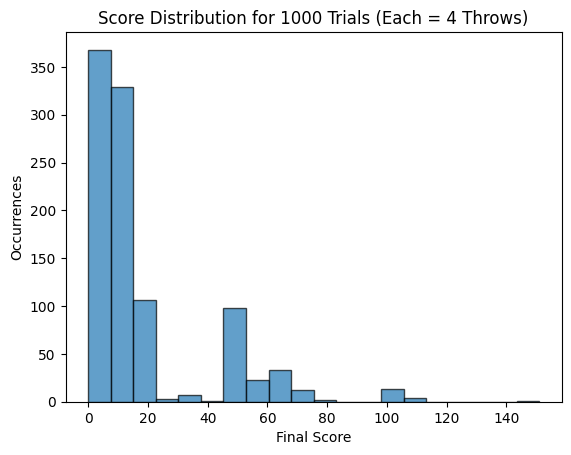

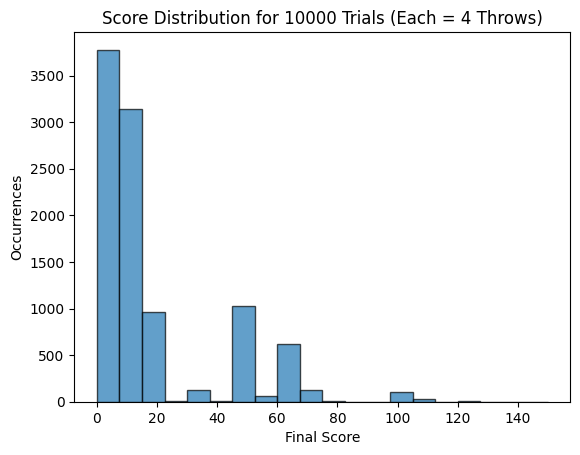

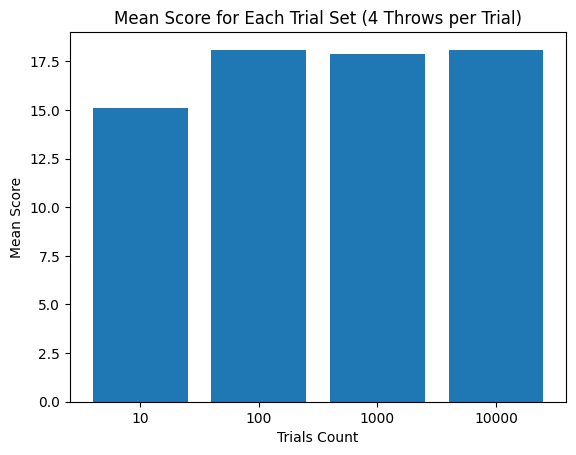

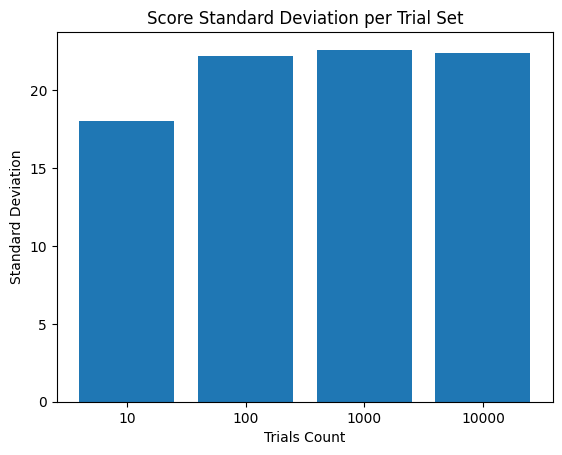

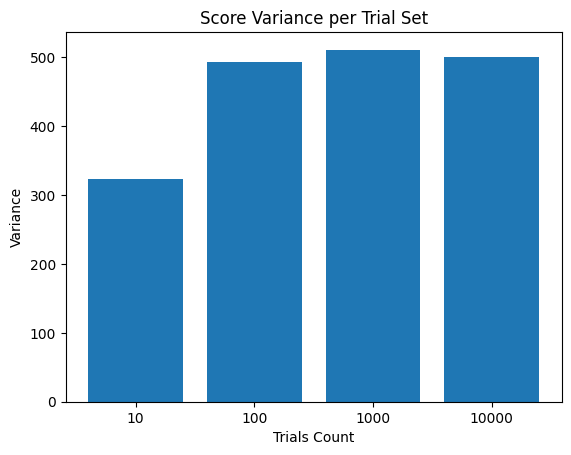

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Likelihoods and point values for dart attempts
hit_chances = 10/235, 125/235, 75/235, 25/235  # Probability for each scoring zone
dart_points = [-1, 1, 10, 50]  # Associated point values

def run_dart_simulation(trials=10000):
    accumulated_scores = []
    
    for _ in range(trials):
        session_total = 0
        
        # Each trial consists of 4 throws
        for _ in range(4):  
            # Simulate a coin flip to decide if a throw is made
            flip_result = np.random.choice([0, 1], p=[0.5, 0.5]) 
            # Determine the outcome of the dart throw based on probabilities
            dart_outcome = np.random.choice(dart_points, p=hit_chances) if flip_result == 1 else 0
            session_total += dart_outcome

        # Ensure scores are non-negative
        accumulated_scores.append(max(0, session_total))
    
    return np.array(accumulated_scores)

# Define different numbers of trials
trial_counts = [10, 100, 1000, 10000]
simulated_results = {count: run_dart_simulation(count) for count in trial_counts}

# Compute mean scores, variance, and standard deviation
average_scores = [np.mean(results) for results in simulated_results.values()]
score_variance = [np.var(results) for results in simulated_results.values()]
score_std_dev = [np.std(results) for results in simulated_results.values()]

# Generate histograms for accumulated scores
for count, results in simulated_results.items():
    plt.figure()
    plt.hist(results, bins=20, edgecolor='black', alpha=0.7)
    plt.title(f"Score Distribution for {count} Trials (Each = 4 Throws)")
    plt.xlabel("Final Score")
    plt.ylabel("Occurrences")
    plt.show()

# Plot mean scores across trials
plt.figure()
plt.bar([str(i) for i in trial_counts], average_scores)
plt.title("Mean Score for Each Trial Set (4 Throws per Trial)")
plt.xlabel("Trials Count")
plt.ylabel("Mean Score")
plt.show()

# Plot standard deviation of scores
plt.figure()
plt.bar([str(i) for i in trial_counts], score_std_dev)
plt.title("Score Standard Deviation per Trial Set")
plt.xlabel("Trials Count")
plt.ylabel("Standard Deviation")
plt.show()

# Plot variance of scores
plt.figure()
plt.bar([str(i) for i in trial_counts], score_variance)
plt.title("Score Variance per Trial Set")
plt.xlabel("Trials Count")
plt.ylabel("Variance")
plt.show()
